# Problem 9 - B-Spline basis functions

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from math import pi, sin, cos

def Chi(a,b,x):
    if (a <= x) and (x < b): return 1.0
    else: return 0.0

def N(j, k, x, t):
    if k == 1:
        return Chi(t[j], t[j+1], x)
    else:
        if (t[j+k-1] - t[j]) == 0: 
            c1 = 0
        else: 
            c1 = (x - t[j]) / (t[j+k-1] - t[j])

        if (t[j+k] - t[j+1]) == 0: 
            c2 = 0
        else: 
            c2 = (t[j+k] - x) / (t[j+k] - t[j+1])

        return  c1 * N(j, k-1, x, t) +  c2 * N(j+1, k-1, x, t)


## a)
The function $N_{j,k}$ is calling itself twice for every call until $k = 1$
$\implies$ complexity is $O(2^{k}) = O(2^{n-1})$

Avoiding the calculation of the same term means that every $N_{j,k}$ is called exactly once. We can derive the complexity of this algorithm by listing every possible $N_{j,k}$ in a matrix. The size of that matrix represents the complexity

$
\begin{matrix} 
N_{0, 2} & N_{0, 3} & ... & N_{0, n-1} \\
N_{1, 2} & N_{1, 3} & ... & N_{1, n-1} \\
... \\
N_{n-1, 2} & N_{n-1, 3} & ... & N_{n-1,n-3} \\
\end{matrix} \implies O((n-3)\cdot(n-3)) = O(n^2 - 6n + 9) = O(n^2)$

## b) Plotting with different knots

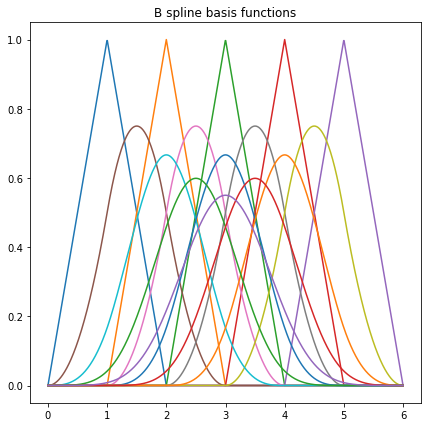

In [4]:
# Plotting the functions for knots t_j = j
# note that the functions for k==1 are not plotted because this makes the graph ugly
n = 8
x_vals = np.linspace(0,n-2, 1000)
t = [j for j in range(n)]

plt.figure(figsize=(7,7))
for k in range(2,n):
    for j in range(n-k-1):
        y_vals = [N(j, k, x, t) for x in x_vals]
        plt.plot(x_vals, y_vals)
plt.title("B spline basis functions")
plt.show()

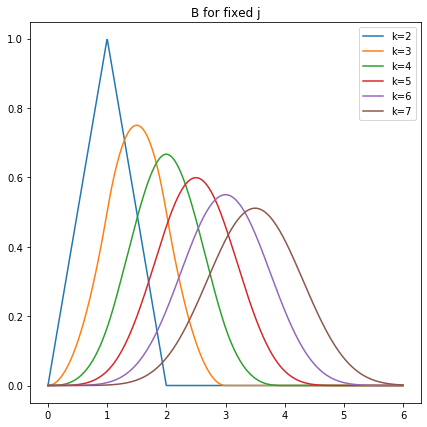

In [6]:
plt.figure(figsize=(7,7))
for k in range(2,n):
    j = 0
    y_vals = [N(j, k, x, t) for x in x_vals]
    plt.plot(x_vals, y_vals, label="k="+str(k))
plt.legend()
plt.title("B for fixed j")
plt.show()

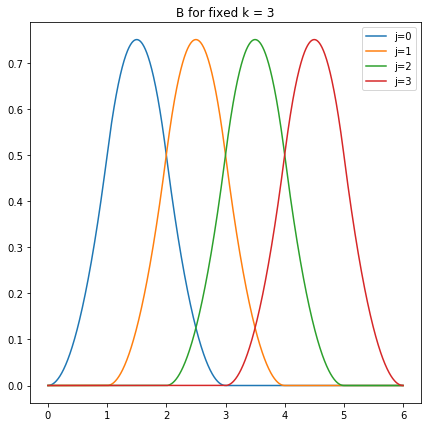

In [8]:
plt.figure(figsize=(7,7))
t = [j for j in range(n)]
k = 3
for j in range(n-k-1):
    y_vals = [N(j, k, x, t) for x in x_vals]
    plt.plot(x_vals, y_vals, label="j="+str(j))
plt.legend()
plt.title("B for fixed k = 3")
plt.show()

[0, 0, 0, 0, 1, 2, 3, 4, 5, 6, 7, 8, 8, 8, 8]


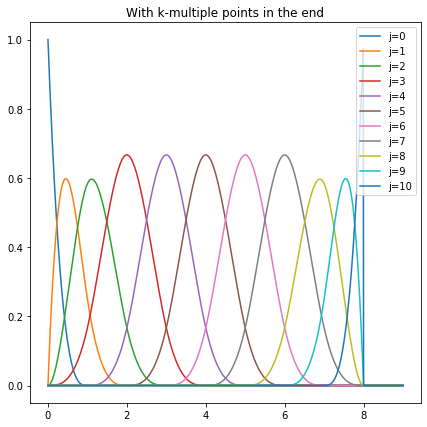

In [10]:
plt.figure(figsize=(7,7))
k = 4
n = 9
x_vals = np.linspace(0,n, 1000)
t = [0 for i in range(k-1)] + [j for j in range(n-1)] + [n-1 for i in range(k)]
print(t)

for j in range(n+k-2):
    y_vals = [N(j, k, x, t) for x in x_vals]
    plt.plot(x_vals, y_vals, label="j="+str(j))
plt.legend()
plt.title("With k-multiple points in the end")
plt.show()

## c) Plot sum-thing

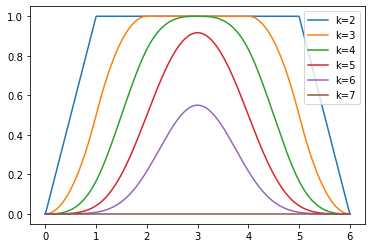

In [12]:
n = 8
x_vals = np.linspace(0,n-2, 1000)
t = [j for j in range(n)]


plt.cla()
for k in range(2,n):
    y_sum = np.zeros(len(x_vals), dtype=float)
    for j in range(n-k-1):
        y_sum += np.array([N(j, k, x, t) for x in x_vals])
    plt.plot(x_vals, y_sum, label="k="+str(k))

plt.legend()
plt.show()

## d) Plot with multiple internal knots

[0, 1, 2, 3, 3, 4, 5, 6, 7, 8, 9]


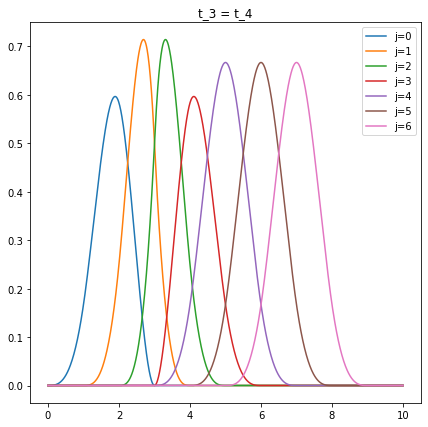

In [14]:
plt.figure(figsize=(7,7))
k = 4
n = 10
x_vals = np.linspace(0,n, 1000)
t = [j for j in range(n)] 
t.insert(3, 3)
print(t)

for j in range(n-k+1):
    y_vals = [N(j, k, x, t) for x in x_vals]
    plt.plot(x_vals, y_vals, label="j="+str(j))
plt.legend()
plt.title("t_3 = t_4")
plt.show()

# Problem 10 - DeBoor Algorithm

In [18]:
# Functrions from Exercise shit
def f_x(t): return (t+1)*cos(4*pi*t)    
def f_y(t): return (t+1)*sin(4*pi*t)

Implementation of the DeBoor Algorithm

In [20]:
# C-Coefficients accordinbg to (Dahmen+Reusken Alg 9.12)
def C(j, p, k, x_vals, c_vals, t):   
    if p == 0:
        return c_vals[j]
    else:
        return (x_vals - t[j]) / (t[j+k-p] - t[j]) * C(j, p-1, k, x_vals, c_vals, t) + \
           (t[j+k-p] - x_vals) / (t[j+k-p] - t[j]) * C(j-1, p-1, k, x_vals, c_vals, t)


# Find m ∈[t_m, t_m+1] while excluding k-multiple points at the ends
# Would work much faster with divide-and-conquer algorithm but this one does the job as well
def find_m(x, t, k):
    for m in range(len(t)-1):
        if t[m] <= x < t[m+1]: 
            return m
    return len(t)-k-2

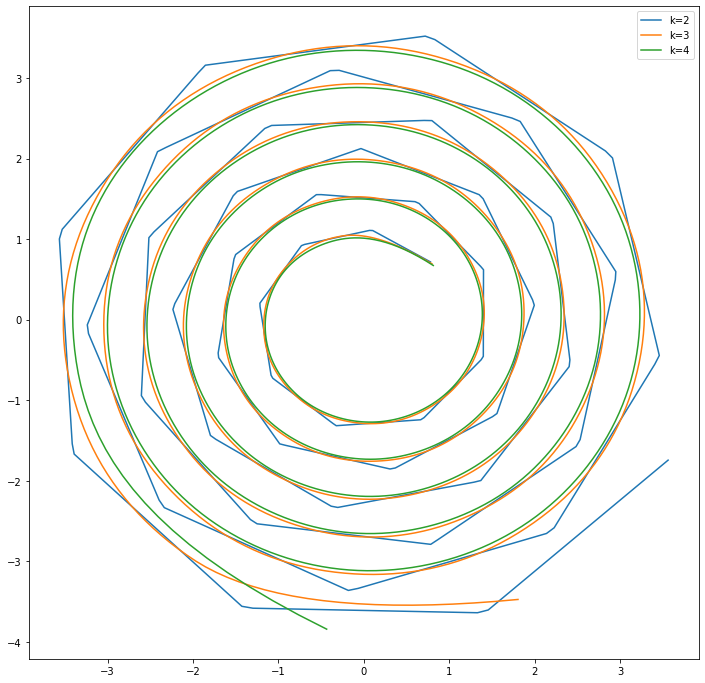

In [22]:
end = pi
pts = 1000

def BSpline(f, k):
    #k = 1
    n = 50
    knots = [0 for i in range(k)] + np.linspace(0, end, n).tolist() + [end for i in range(k)]   # Knots with k-multiple at the ends
    control_points = [f(j) for j in np.linspace(0, end,n+2*k)]
    return [C(find_m(t, knots, k), k-1, k, t, control_points, knots) for t in np.linspace(0, end, pts)]

# Spline values
plt.figure(figsize=(12,12))
for k in range(2,5):
    S_x = BSpline(f_x, k)
    S_y = BSpline(f_y, k)
    plt.plot(S_x, S_y, label="k="+str(k))


plt.legend()
plt.show()

# Problem 11 - Derivatives of B-Splines


fuck that one..

# Problem 12 - Discrete Fourier Transform

In [24]:
import numpy as np
from math import sin, cos, pi, exp, log2
from scipy.fftpack import fft
import time
import matplotlib.pyplot as plt


In [26]:
def f1(x): return sin(40*pi*x)
def f2(x,a=0.25, b=0.75): 
    if (a <= x) and (x < b): return 1.0
    else: return 0.0
def f3(x): return min([x, 1 - x])
def f4(x): return exp(-100.0*(x-0.5)**2)
def f5(x): return exp(-4.0*(x-0.5)**2)
def f6(x): return exp(-100.0*(x-0.5)**2) * sin(40*pi*x)

func_list = [f1, f2, f3, f4, f5, f6]

## a) Evaluation of the runtime and memory requirements

The DFT of a vector of size N is a linear transformation and can therefore be written as:

$ \bar{f} = M \cdot a$

with $M_{j,k}$ being a N x N Matrix

$M_{j,k} = e^{-2\pi i \cdot \frac{j \cdot k}{N}}$

The complexity of a matrix-vector calculation DFT is $O(n^2)$
We need memory for the input- and output-vector and the matrix

$\implies Memory = (N^2 + 2N) \cdot Bytes/value $ 

Using complex float64 number from numpy (8 Bytes for real and imag. part = 16 bytes / value) and p = 16, one DFT would require 

$(2^{16^2} + 2 \cdot 16) \cdot 16 bytes \approx 69 GB $

Using the same approximation but for FFT ($O(N \cdot log(N)$)evaluates to 

$2^{16} \cdot log(2^{16}) \cdot 16 bytes \approx 5 MB $




In [28]:
def normalize(v):
    norm=np.linalg.norm(v, ord=1)
    if norm==0:
        norm=np.finfo(v.dtype).eps
    return v/norm

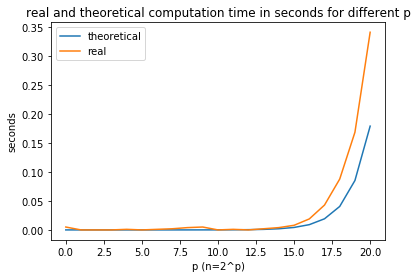

In [30]:
times = []
p_max = 22 # evaluated b trial and error 
for p in range(2, p_max+1):
    n = 2**p
    x = [j/n for j in range(n)]
    f1_vals = np.array([f1(x_i) for x_i in x])

    start_time = time.time()
    a_k = fft(f1_vals)
    end_time = time.time()
    times.append(end_time - start_time)

# calculate the theoretical complexities and then normalize it with the longest time
# this allows us to roughly compare theoretical vs real
complexities = []
for p in range(2, p_max+1):
    n = 2**(p-1)
    complexities.append(n*log2(n))
complexities = normalize(complexities)*(times[-1])

plt.plot(complexities, label="theoretical")
plt.plot(times, label="real")
plt.legend()
plt.title("real and theoretical computation time in seconds for different p")
plt.ylabel("seconds")
plt.xlabel("p (n=2^p)")
plt.show()




The evaluation for $p=22$ took on my machine 0.35s

We can estimate the time a DFT of the same size would take by multiplying it with the ration of the complexities of a given N

$t = t_{FFT} \cdot \frac{O(N^2)}{O(N \cdot log(N))} = 0.35s \cdot \frac{O(2^{16^2})}{O(2^{16} \cdot log(2^{16}))} \approx 2000 years $




# b) Relation between $a_k$ and $a_{n-k}$

The FFT algorithm returns a series that is mirrored around $a_{n/2}$ 

$\implies a_k = a_{n-k}$

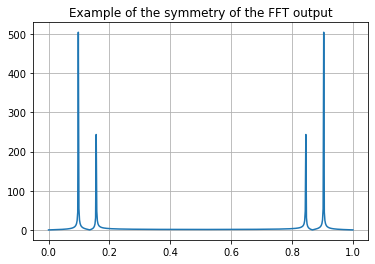

In [32]:
n = 2**9
x = np.linspace(0.0, n, n)
y = np.sin(50.0 * 2.0*np.pi*x) + 0.5*np.sin(80.0 * 2.0*np.pi*x)
yf = fft(y)
xf = np.linspace(0.0, 1.0, n)
plt.plot(xf, 2.0 * np.abs(yf))
plt.title("Example of the symmetry of the FFT output")
plt.grid()
plt.show()

# c) Testing different functions

In [34]:
def plot_fft(f):

    p = 8
    n = 2**p
    x = np.linspace(0.0, 1, n)
    y = [f(x) for x in x]
    yf = fft(y)
    xf = np.linspace(0.0, 1.0/(2.0), n//2)

    #plt.cla()
    plt.figure(figsize=(10,7))
    plt.subplot(221)
    plt.plot(x,y)
    plt.grid()
    plt.title("time space")
    plt.subplot(222)
    plt.plot(xf, 2.0/n * np.abs(yf[0:n//2]))
    plt.title("frequency space")
    plt.grid()
    plt.show()

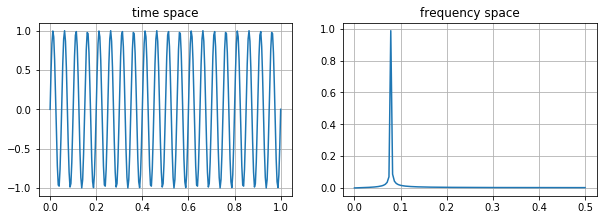

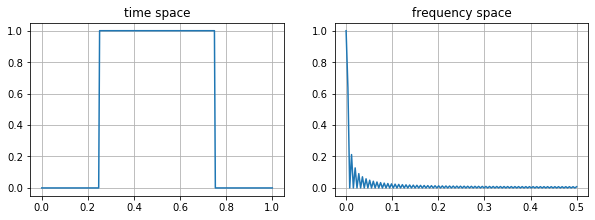

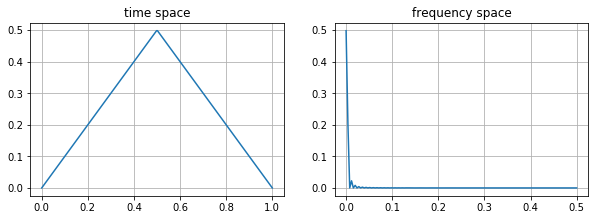

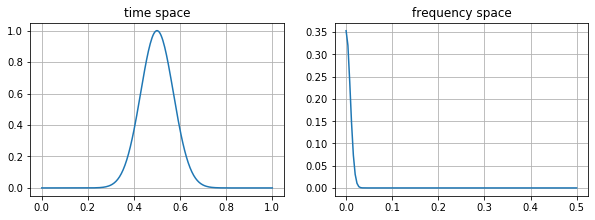

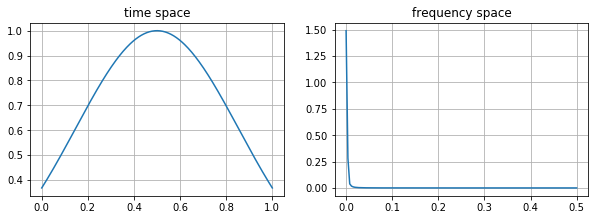

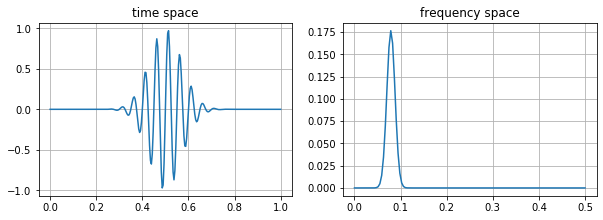

In [36]:
for f in func_list:
    plot_fft(f)


By messing around I found that

$C = 1/N$

$\beta = 1$

Very basic Explanation: If we increase N we increase the amount of points in time-space and therefore the highest possible frequency that can be represented below the shannon nyquist limit.
The discrete frequency space contains "a list" of frequencies that can be represented in time-space. If we increase N we increase the number of possible frequencies in said list. Therefore, any peaks in frequency-space will get sharper with bigger N since those peak frequencies make up a smaller portion of our total frequency space. 

Or in other words:
If our time-signal contains half of all possible frequencies, 1/2 of all $a_k$ will be non-zero. If we double the resolution but dont change the signal only 1/4 of all $a_k$ will be non zero as more frequencies can no be represented, and so on..
$\implies 1/N-Relation $


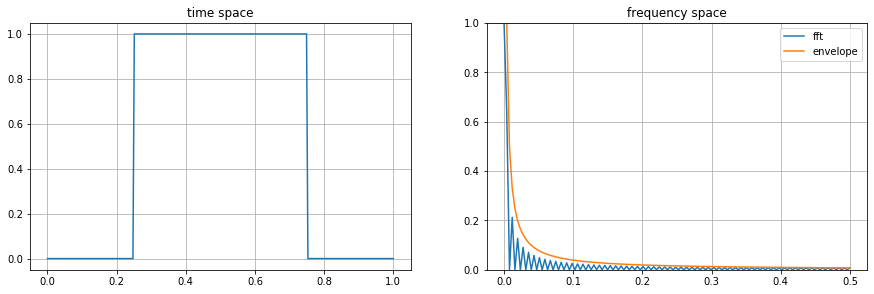

In [38]:
f = f2
p = 8
n = 2**p
x = np.linspace(0.0, 1, n)
y = [f(x) for x in x]
yf = fft(y)
xf = np.linspace(0.0, 1.0/(2.0), n//2)

C= 1.0/(n)
b = 1
envelope = [C*i**-b for i in xf]

plt.figure(figsize=(15,10))
plt.subplot(221)
plt.plot(x,y)
plt.grid()
plt.title("time space")
plt.subplot(222)
plt.plot(xf, 2.0/n * np.abs(yf[0:n//2]), label="fft")
plt.plot(xf, envelope, label="envelope")
plt.ylim(0,1)
plt.title("frequency space")
plt.legend()
plt.grid()
plt.show()